In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

file = pd.read_csv('stud_math.csv')
display(file.head(10))
file.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
file.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [3]:
# убрали лишнюю колонку без описания на сайте
file.drop(['studytime, granular'], inplace=True, axis=1)

In [4]:
file.isna().sum()  # посмотрим, какие колонки не заполнены полностью

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

# Начнем обработку данных

Сейчас будет блок функций для обработки данных с заменой пропусков

In [5]:
'''Данная функция просматривает столбец и считает входящие в него значения, после чего выводит сумму этих значений на экран'''


def show_column(column):
    display(pd.DataFrame(file[column].value_counts()))


for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    show_column(col)

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,failures
0.0,293
1.0,49
2.0,16
3.0,15


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [6]:
# Поработаем со строковыми колонками

def change_none(column):
    file[column] = file[column].apply(
        lambda x: None if pd.isna(x) == True or pd.isnull(x) == True else x)


for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health', 'absences', 'score']:
    change_none(col)


def change_nan(column):
    file[column] = file[column].astype(str).apply(
        lambda x: None if x.strip() == ' ' else x)


for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health', 'absences', 'score']:
    change_nan(col)

Поработаем с числовыми колонками

In [7]:
'''Создадим список, куда положим медианные значения всех числовых колонок'''

list1 = []


def median_value(column):
    med = file[column].median()
    print("Медиана для колонки " + column + ":", med)
    list1.append(med)


for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    median_value(col)
print()
print(list1)

Медиана для колонки Medu: 3.0
Медиана для колонки Fedu: 2.0
Медиана для колонки traveltime: 1.0
Медиана для колонки studytime: 2.0
Медиана для колонки failures: 0.0
Медиана для колонки famrel: 4.0
Медиана для колонки freetime: 3.0
Медиана для колонки goout: 3.0
Медиана для колонки health: 4.0
Медиана для колонки absences: 4.0
Медиана для колонки score: 55.0

[3.0, 2.0, 1.0, 2.0, 0.0, 4.0, 3.0, 3.0, 4.0, 4.0, 55.0]


In [8]:
'''Создадим список, куда положим самые популярные значения в столбце
(пусть это и не самое верное решение, но для теста сойдет)'''
list2 = []

def most_pop_value(column):
    mode = file[column].value_counts().idxmax()
    print("Мода для колонки " + column + ":", mode)
    list2.append(mode)
    

for col in ['address', 'famsize', 'Pstatus', 'Mjob',
            'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    most_pop_value(col)
    
print()
print(list2) 


Мода для колонки address: U
Мода для колонки famsize: GT3
Мода для колонки Pstatus: T
Мода для колонки Mjob: other
Мода для колонки Fjob: other
Мода для колонки reason: course
Мода для колонки guardian: mother
Мода для колонки schoolsup: no
Мода для колонки famsup: yes
Мода для колонки paid: no
Мода для колонки activities: yes
Мода для колонки nursery: yes
Мода для колонки higher: yes
Мода для колонки internet: yes
Мода для колонки romantic: no

['U', 'GT3', 'T', 'other', 'other', 'course', 'mother', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no']


In [9]:
'''Теперь поменяем значение в численной колонке на медианное значение из списка выше'''


def new_change_nan(column):
    a = 0
    file[column].replace('nan', list1[a], inplace=True)
    a += 1
    

for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    new_change_nan(col)

In [10]:
'''Заменим строковые колонки на самое популярное значение из этой колонки'''


def new_change_pop(column):
    file[column].replace(
        'None', file[column].value_counts().idxmax(), inplace=True)


for col in ['address', 'famsize', 'Pstatus', 'Mjob',
            'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    new_change_pop(col)

In [11]:
'''Посмотрим на наши данные после всех замен'''

for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'famsize',
            'freetime', 'goout', 'health', 'absences', 'score']:
    show_column(col)

,address
U,312
R,83


,famsize
GT3,288
LE3,107


,Pstatus
T,359
A,36


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
3.0,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
3.0,24
0.0,2
40.0,1


,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


,reason
course,154
home,104
reputation,103
other,34


,guardian
mother,281
father,86
other,28


,traveltime
1.0,242
2.0,96
3.0,28
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27
3.0,7


,failures
0.0,293
1.0,49
3.0,22
2.0,16
3.0,15


,schoolsup
no,344
yes,51


,famsup
yes,258
no,137


,paid
no,240
yes,155


,activities
yes,209
no,186


,nursery
yes,316
no,79


,higher
yes,376
no,19


,internet
yes,339
no,56


,romantic
no,271
yes,124


,famrel
4.0,182
5.0,99
3.0,62
3.0,27
2.0,17
1.0,7
-1.0,1


,famsize
GT3,288
LE3,107


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
3.0,11


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
3.0,8


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
3.0,15


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
3.0,12
12.0,12
3.0,8


,score
50.0,54
55.0,46
0.0,37
75.0,33
40.0,31
60.0,31
65.0,31
45.0,27
70.0,27
80.0,16


In [12]:
# убедимся, что не осталось необработанных значений
file.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
score         0
dtype: int64

Первая часть задачи сделана - не осталось пустых значений, столбцы с числами
заполнены медианой, строковые столбцы заменены на самое частое. Очевидно, что в наших
данных присутствуют выбросы. Сейчас приступим к анализу таких столбцов и решим, как поступим
с выбивающимися значениями.

# Начнем обработку по очистке данных

In [14]:
'''Поменяем все значения float на int, чтобы в дальнейшем меньше ругалась программа'''


def to_numeric(column):
    file[column] = pd.to_numeric(file[column])
    file[column] = file[column].astype(int)


for col_num in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    to_numeric(col_num)

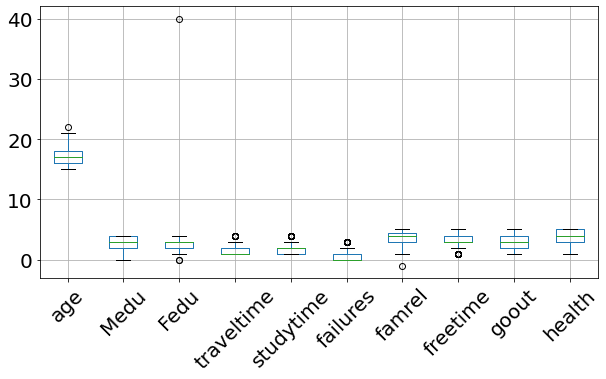

In [15]:
# На боксплотах мы отчетливо видим выбросы.
# Вернувшись к описанию каждлй колонки, попробуем понять,
# что делать с конкретным значением,которое вылетело

boxplot = file.boxplot(column=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                               'freetime', 'goout', 'health'], fontsize=20, figsize=(10, 5), grid=True, rot=45)

## Возраст

In [16]:
# обнаружен 1 человек. Но почему 22-хлетний не может быть учениеком?
file.loc[file.age == file.age.max()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3,1,services,services,other,mother,1,1,3,no,no,no,no,no,no,yes,yes,5,4,5,1,16,40


## Образование отца

In [17]:
file.loc[file.Fedu == file.Fedu.max()] #Вероятно произошла "описка", вместо 4.0 человек поставил 40. Заменим это на 4.0
file.Fedu = file.Fedu.apply(lambda x: 4 if x == 40 else x)

In [18]:
file.loc[file.Fedu == file.Fedu.min()]  # эти два ученика решено мной оставить

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
76,GP,M,15,U,GT3,T,4,0,teacher,other,course,mother,2,4,0,no,no,no,yes,yes,yes,yes,no,3,4,3,1,8,50
171,GP,M,16,U,GT3,T,1,0,other,other,reputation,mother,2,2,3,no,yes,yes,yes,yes,yes,yes,yes,4,3,2,3,2,80


## Traveltime

In [19]:
# обнаружено 7 человек
file.loc[file.traveltime == file.traveltime.max()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
61,GP,F,16,U,GT3,T,1,1,services,services,course,father,4,1,0,yes,yes,no,yes,no,yes,yes,yes,5,5,5,5,6,55
108,GP,M,15,R,GT3,T,4,4,other,other,home,father,4,4,3,no,yes,yes,yes,yes,yes,yes,yes,1,3,5,1,6,65
149,GP,M,15,U,LE3,T,2,1,services,other,course,mother,4,1,3,no,yes,no,no,yes,yes,yes,no,4,5,5,5,0,50
164,GP,M,17,R,LE3,T,1,1,other,services,course,mother,4,2,3,no,no,no,yes,yes,no,no,yes,5,3,5,3,0,35
228,GP,M,18,U,GT3,T,2,1,at_home,other,course,mother,4,2,0,yes,yes,yes,yes,yes,yes,yes,yes,4,3,2,3,14,45
327,GP,M,17,R,GT3,T,2,2,services,other,course,mother,4,1,0,no,yes,no,no,yes,yes,yes,no,4,4,5,4,8,50
375,MS,F,18,R,GT3,T,1,1,other,other,home,mother,4,3,0,no,no,no,no,yes,yes,yes,no,4,3,2,4,2,50


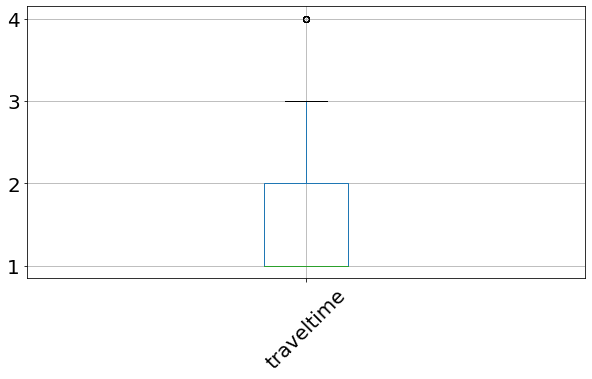

In [20]:
boxplot = file.boxplot(column=['traveltime'],
                       fontsize=20, figsize=(10, 5), grid=True, rot=45)
file = file[file.traveltime < file.traveltime.max()]  # убираем выброс

## Studytime

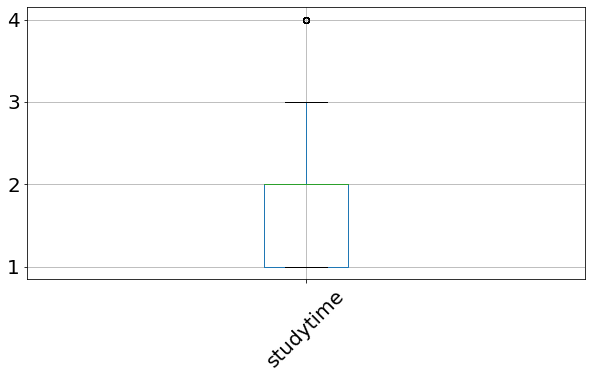

In [21]:
boxplot = file.boxplot(column=['studytime'],
                       fontsize=20, figsize=(10, 5), grid=True, rot=45)

# Помня, что 4 - это максимальнео время, затрачиваемое на учебу, всех оставим

## Failures 

6.0

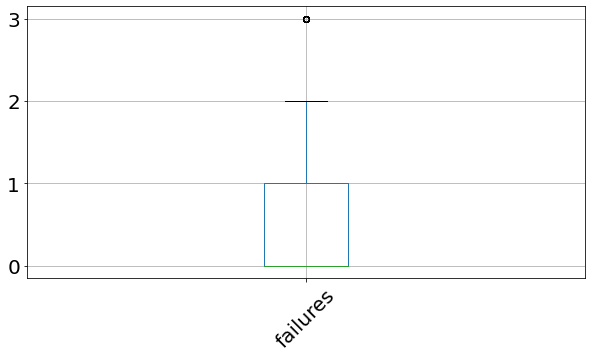

In [22]:

boxplot = file.boxplot(column=['failures'],
                       fontsize=20, figsize=(10, 5), grid=True, rot=45)
file.loc[file.failures == file.failures.max()]['absences'].mean()


In [23]:
file.loc[file.failures == file.failures.max()]['score'].mean()

44.794117647058826

In [24]:
file.loc[file.failures < file.failures.max()]['score'].mean()

52.18926553672316

По столбцу 'failures' для меня неоднозначная ситуация. Боксплот показывает четкий выброс, но таких людей 34, а это порядка 7-9% от общего числа студенов, тем более какие-то выбросы уже устранены.
Средний балл у них ниже 45, то есть внеучебные неудачи и правда снижают их работоспособность. Также пропуски в среднем у таких учеников составляют 6. Для учеников с параметром 'failures' средний балл выше. Поскольку сейчас работа творческая, и опыта в отсеве нет, то я решаю эти 34 ученика все же убрать из данных.

In [25]:
file = file[file.failures < file.failures.max()]  # убираем выброс

## Freetime

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,6,30
19,GP,M,16,U,LE3,T,4,3,health,other,home,father,1,1,0,no,no,no,yes,yes,yes,yes,no,3,1,3,5,4,50
89,GP,M,16,U,LE3,A,4,4,teacher,health,reputation,mother,1,2,0,no,yes,no,no,yes,yes,no,no,4,1,3,5,18,35
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,2,50
106,GP,F,15,U,GT3,T,2,2,other,other,course,mother,1,4,0,yes,yes,yes,no,yes,yes,yes,no,5,1,2,3,8,40
111,GP,F,16,R,GT3,T,3,3,services,other,reputation,father,1,3,1,yes,yes,no,yes,yes,yes,yes,no,4,1,2,2,0,50
112,GP,F,16,U,GT3,T,2,2,at_home,other,course,mother,3,3,1,yes,no,no,yes,yes,yes,yes,no,3,1,2,5,6,65
168,GP,F,16,U,GT3,T,2,2,other,other,home,mother,1,2,0,no,yes,yes,no,no,yes,yes,no,5,1,5,4,0,0
189,GP,M,17,R,GT3,T,1,2,at_home,other,home,mother,1,2,0,no,no,no,no,yes,yes,no,no,3,1,3,3,4,50
238,GP,F,17,R,GT3,T,2,1,at_home,services,course,mother,3,2,0,no,no,no,yes,yes,yes,no,no,2,1,1,3,2,55


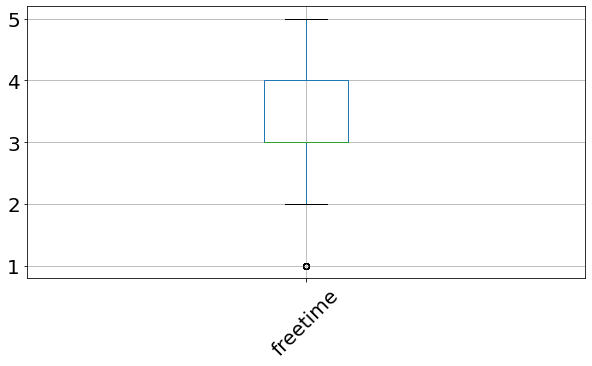

In [26]:
boxplot = file.boxplot(column=['freetime'],
                       fontsize=20, figsize=(10, 5), grid=True, rot=45)
file.loc[file.freetime == file.freetime.min()] #видим, что довольно много учеников в выбросе, будем разбираться

In [27]:
file.loc[file.freetime == file.freetime.min()]['score'].mean()

48.8235294117647

In [28]:
file.loc[file.freetime > file.freetime.min()]['score'].mean()

52.359050445103854

In [29]:
file.loc[file.freetime == file.freetime.max()]['score'].mean()

57.43333333333333

Поскольку для параметра 'freetime' 1 -> это "очень мало", то немного удивительно, почему баллы ниже у тех, кто больше погружен в учебу (но точно ли они все именно ботают?) С другой стороны, те, кто больше отдыхает, получает баллы выше, поскольку голова отдыхает, больше отдыха и радости. Самые "свободные" ученики имеют баллы значительно выше самых "скованных во времени". Интересный оказался столбец, пожалуй, оставим данный выброс, поскольку наблюдается (хочется видеть) некую зависимость. 

## famrel 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,2,no,yes,yes,no,no,yes,yes,no,-1,2,2,5,14,40
66,GP,M,15,U,GT3,A,4,4,other,services,reputation,mother,1,4,0,no,yes,no,yes,no,yes,yes,yes,1,3,3,3,4,60
184,GP,F,16,U,GT3,T,3,2,other,other,reputation,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,1,2,2,1,14,60
207,GP,F,16,U,GT3,T,4,3,teacher,other,other,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,1,3,2,1,10,65
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,yes,1,4,2,1,5,80
357,MS,F,17,U,LE3,T,3,2,services,other,reputation,mother,2,2,0,no,no,no,no,yes,yes,no,yes,1,2,3,5,2,55
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,3,2,1,no,no,no,yes,yes,yes,yes,no,1,1,1,5,0,0


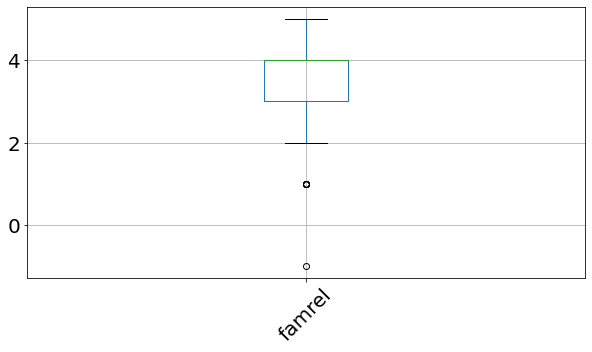

In [30]:
boxplot = file.boxplot(
    column=['famrel'], fontsize=20, figsize=(10, 5), grid=True, rot=45)
file.loc[file.famrel <= 1]

In [31]:
file.famrel = file.famrel.apply(lambda x: 1 if x == -1 else x) #скорее всего была описка, поменяем "-1" на "1"

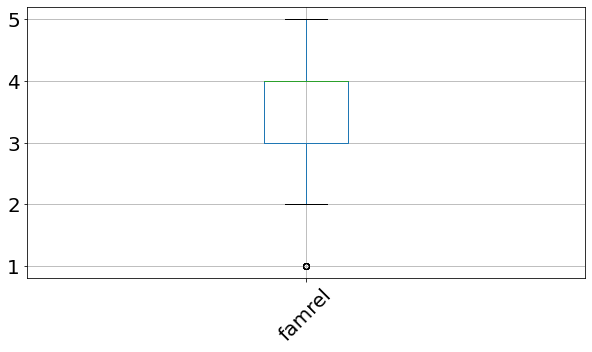

In [32]:
boxplot = file.boxplot(
    column=['famrel'], fontsize=20, figsize=(10, 5), grid=True, rot=45)

In [33]:
file.loc[file.famrel == 1]['score'].mean()

51.42857142857143

In [34]:
file.loc[file.famrel > 1]['score'].mean()

52.20461095100865

По предыдущим двум строкам видно, что средний балл учеников с 'famrel'=1 и 'famrel'>1 практически не различаются, что говорит о крайне слабой связи этих двух параметров. Поэтому всех этих учеников из выбросов оставим в данных.

## Absences 

'Данный boxplot показывает доволное большое количество выбивающихся значений'

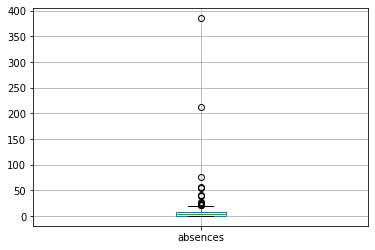

In [35]:
boxplot = file.boxplot(['absences'])

'''Данный boxplot показывает доволное большое количество выбивающихся значений'''

In [36]:
file.loc[file.absences > 100]['score'].mean()

65.0

Целая серия анализов со значением отсечки (от >20 до >100) показали, что набранный балл учеником
становится только выше. То есть ученик способен набирать много баллов на экзамене, даже если 
у него много пропусков. Отсечка ">20" отрежет довольно способных учеников, который в среднем
имеют балл порядка 50. Поэтому, скрепя сердце, я решаю их всех оставить. Вероятно столбец "Пропуски"
в дальнейшем мной будет опущен.

# Теперь перейдем к главной части анализа - тест Стьюдента

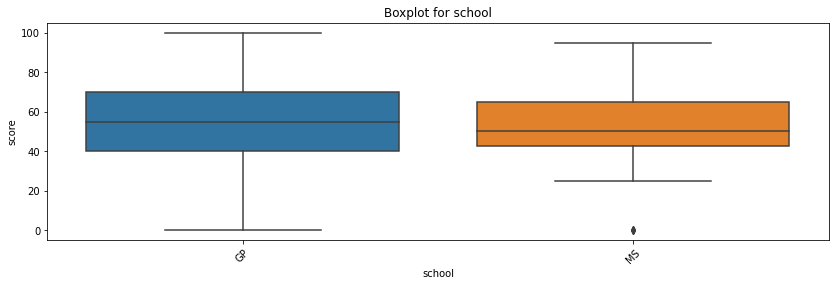

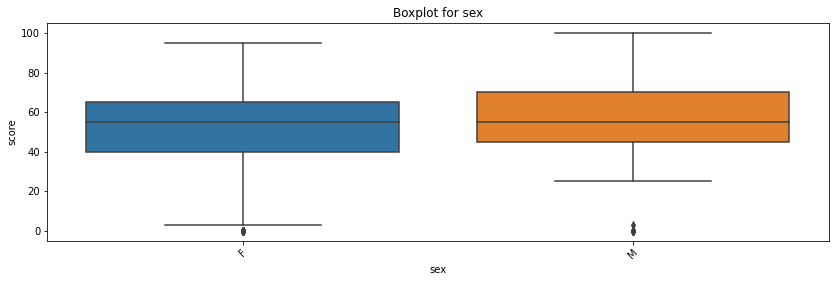

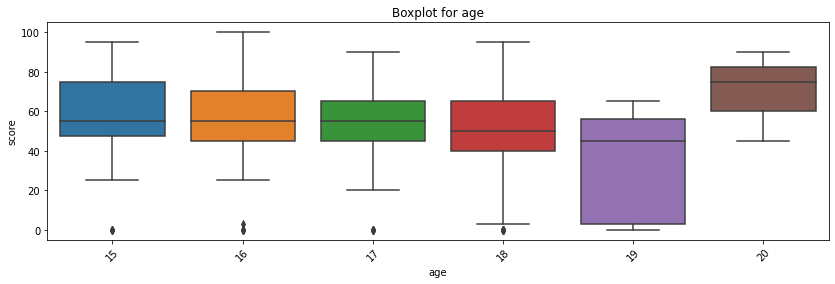

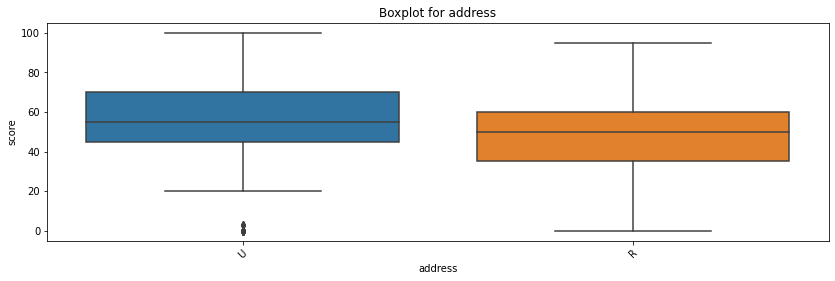

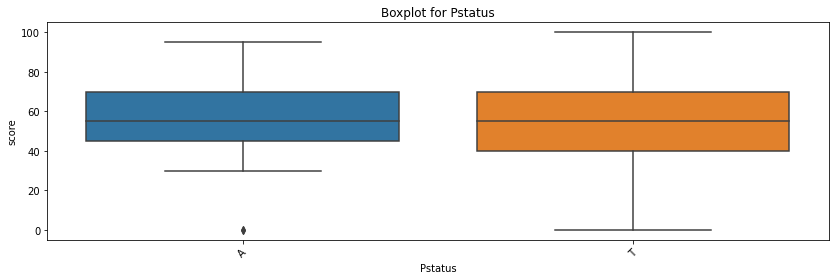

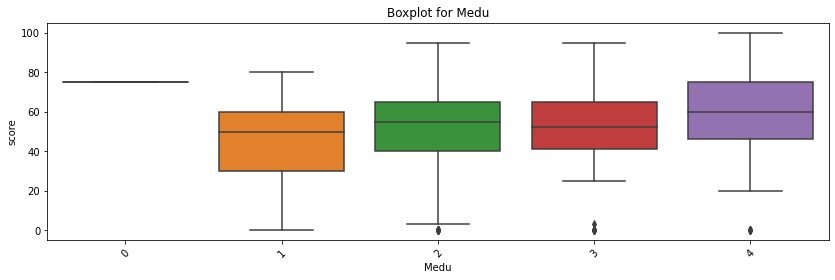

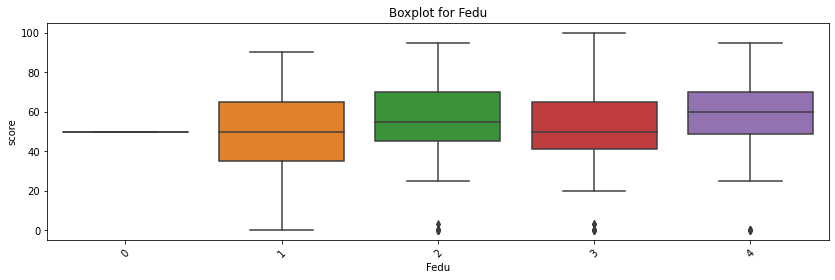

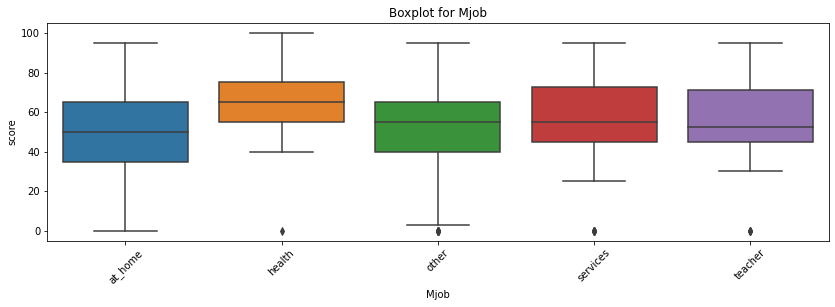

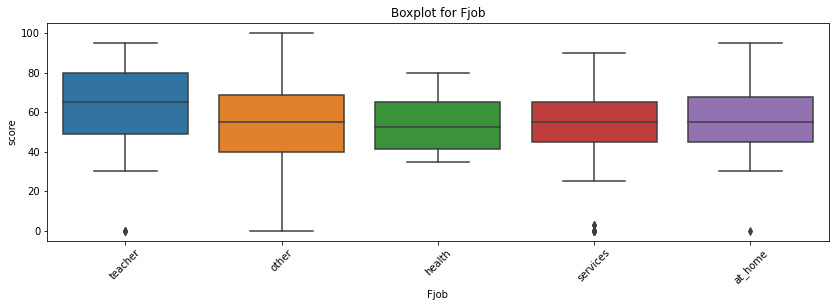

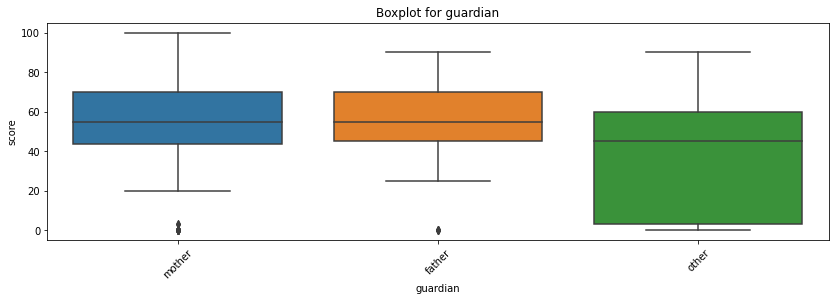

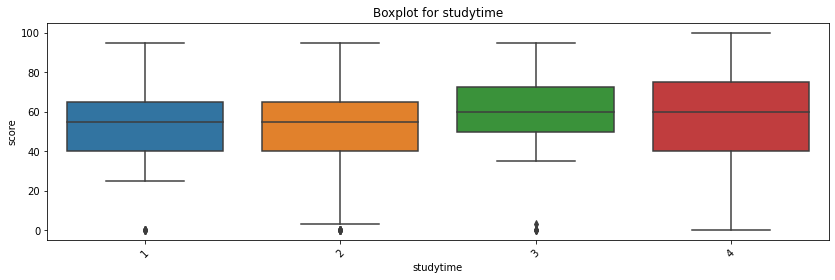

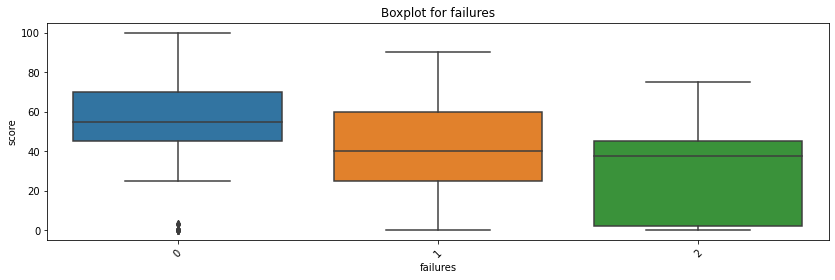

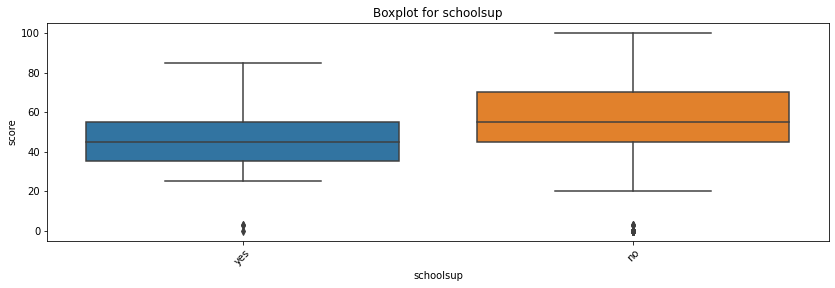

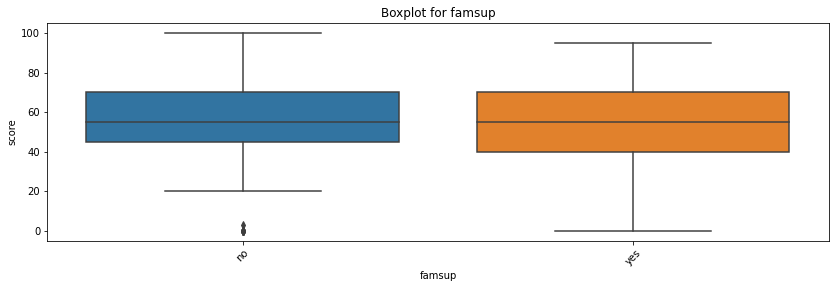

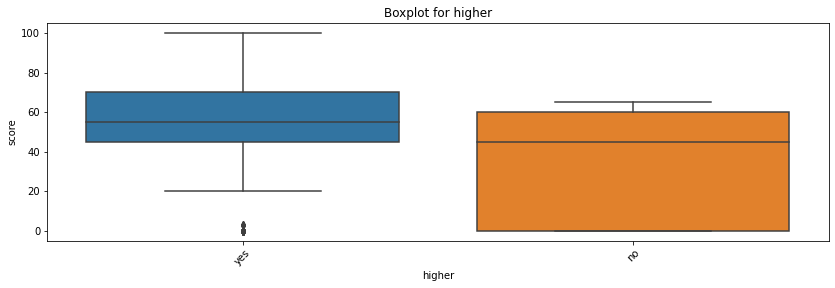

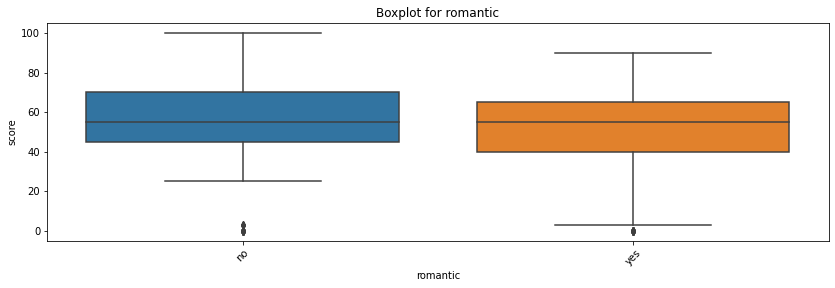

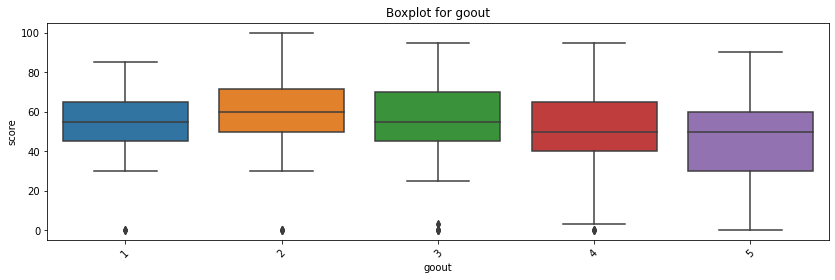

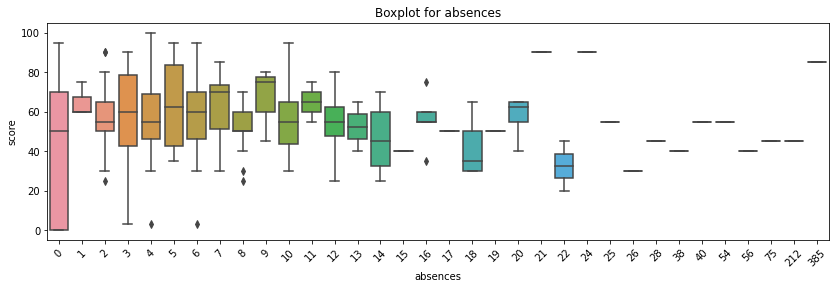

In [37]:
'''Построим boxplot для всех характеристик, которые указаны в таблице'''


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=file[column], y=file['score'],
                data=file.loc[file.loc[:, column].isin(
                    file.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col2 in [
    'school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
    'Fjob', 'guardian', 'studytime', 'failures', 'schoolsup',
    'famsup', 'higher', 'romantic', 'goout', 'absences'
]:
    get_boxplot(col2)

In [38]:
'''Найдем статистически значимые различия'''


def get_stat_dif(column):
    cols = file.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(file.loc[file.loc[:, column] == comb[0], 'score'],
                     file.loc[file.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


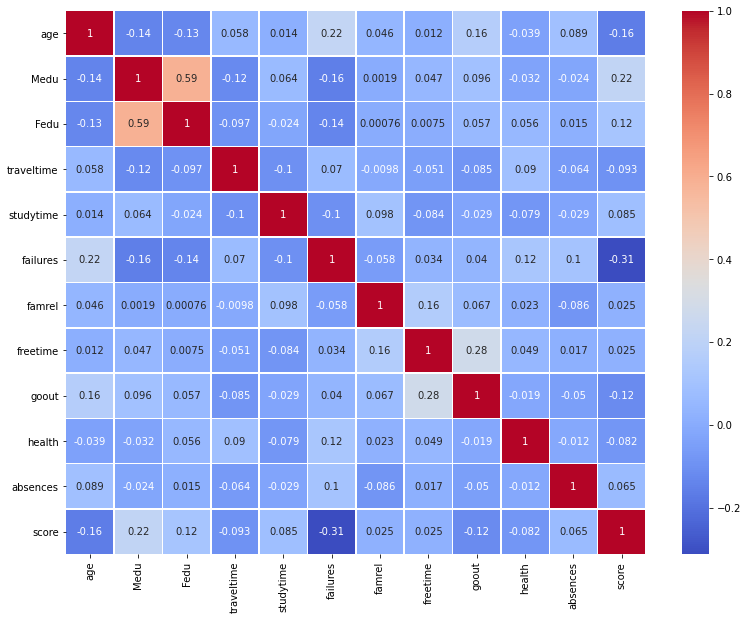

In [39]:
fig, ax = plt.subplots(figsize=(13, 10))
correlation = file.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidth=0.5)

Уже на этой стадии видно, что есть столбцы, который крайне мало влияют на 'score', их можно убрать.

In [40]:
file = file.drop(['health', 'famrel', 'traveltime', 'famsize',
                  'freetime', 'studytime', 'absences'], axis=1)

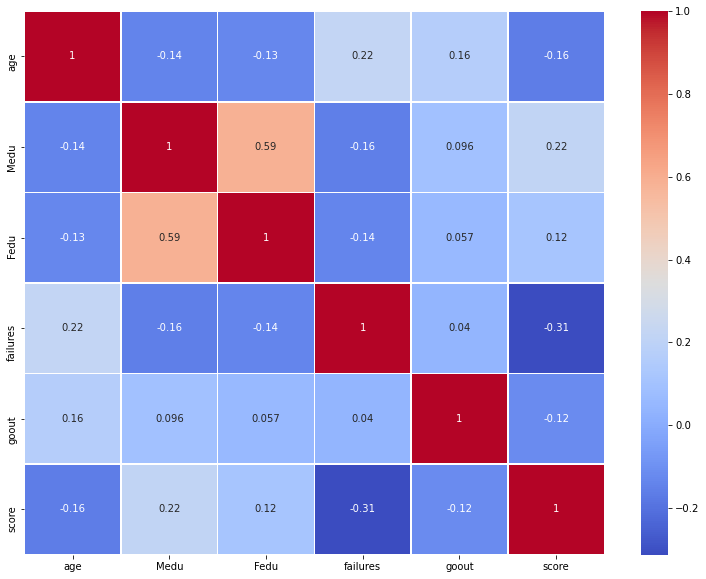

In [41]:
fig, ax = plt.subplots(figsize=(13, 10))
correlation = file.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidth=0.5)

In [42]:
file_for_model = file.loc[:, ['sex', 'age', 'address', 'Medu', 'Fedu',
                              'Mjob', 'guardian', 'failures', 'schoolsup', 'higher', 'romantic','goout', 'score']]
file_for_model.head(20)

,sex,age,address,Medu,Fedu,Mjob,guardian,failures,schoolsup,higher,romantic,goout,score
0,F,18,U,4,4,at_home,mother,0,yes,yes,no,4,30
1,F,17,U,1,1,at_home,father,0,no,yes,no,3,30
3,F,15,U,4,2,health,mother,0,no,yes,yes,2,75
4,F,16,U,3,3,other,father,0,no,yes,no,2,50
5,M,16,U,4,3,services,mother,0,no,yes,no,2,75
6,M,16,U,2,2,other,mother,0,no,yes,no,4,55
7,F,17,U,4,4,other,mother,0,yes,yes,no,4,30
8,M,15,U,3,2,services,mother,0,no,yes,no,2,95
9,M,15,U,3,4,other,mother,0,no,yes,no,1,75
10,F,15,U,4,4,teacher,mother,0,no,yes,no,3,45


### В качестве эксперимента мне хочется провести анализ по данным, которые мы порежем ржавыми ножницами, а именно бездумно устраним абсолютно все выбросы. Посмотрим, какая картина получится в таком случае.

In [43]:
file2 = pd.read_csv('stud_math.csv')

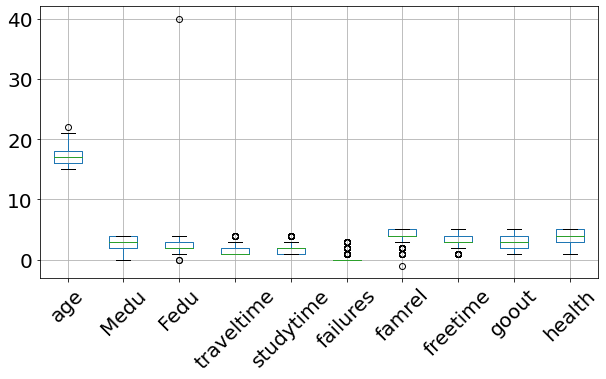

In [44]:
boxplot = file2.boxplot(column=['age','Medu','Fedu', 'traveltime', 'studytime', 'failures','famrel',
                               'freetime', 'goout', 'health'], fontsize=20, figsize=(10,5), grid=True, rot=45)

In [45]:
file2=file2[file2['age'] < 21]  #возраст от 21 года

In [46]:
file2 = file2[file2.Fedu > file2.Fedu.min()]  #убираем выброс

In [47]:
file2 = file2[file2.Fedu < file2.Fedu.max()]  #убираем выброс

In [48]:
file2=file2[file2.traveltime < file2.traveltime.max()]   #убираем выброс

In [49]:
file2=file2[file2.studytime < file2.studytime.max()]   #убираем выброс

In [50]:
file2=file2[file2.failures < 20]  #убираем выброс

In [51]:
file2= file2[file2.freetime > file2.freetime.min()]  #убираем выброс

In [52]:
file2 = file2[file2.famrel > 2]

In [53]:
file2.drop(['studytime, granular'], inplace = True, axis = 1) #убрали лишнюю колонку без описания на сайте

In [54]:
#Посмотрим на наши данные

def show_column(column):
    display(pd.DataFrame(file2[column].value_counts()))

for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
            'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    show_column(col) 

,Medu
4.0,78
2.0,63
3.0,55
1.0,34
0.0,3


,Fedu
2.0,67
4.0,62
3.0,60
1.0,47


,traveltime
1.0,152
2.0,72
3.0,12


,studytime
2.0,126
1.0,66
3.0,44


,failures
0.0,184
1.0,35
2.0,9
3.0,8


,famrel
4.0,130
5.0,63
3.0,43


,freetime
3.0,103
4.0,74
2.0,37
5.0,22


,goout
3.0,84
4.0,55
2.0,53
5.0,26
1.0,12


,health
5.0,79
3.0,54
4.0,40
2.0,31
1.0,26


,absences
0.0,68
4.0,37
2.0,36
6.0,15
8.0,14
10.0,9
12.0,7
3.0,6
16.0,6
14.0,4


,score
50.0,34
55.0,29
0.0,21
70.0,20
65.0,19
40.0,19
60.0,18
75.0,18
45.0,17
30.0,11


In [55]:
#Поработаем со строковыми колонками

def change_none(column):
    file2[column] = file2[column].apply(lambda x: None if pd.isna(x) == True else x)
    
for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    change_none(col)
    
def change_nan(column):
    file2[column] = file2[column].astype(str).apply(lambda x: None if x.strip() == '' else x)
    
for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    change_nan(col)  

In [56]:
list2=[]

def median_value(column):
   
    med = file2[column].median()
    print("Медиана для колонки " + column + ":", med)
    list2.append(med)
    
for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
            'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    median_value(col)
print()    
print(list2)

Медиана для колонки Medu: 3.0
Медиана для колонки Fedu: 3.0
Медиана для колонки traveltime: 1.0
Медиана для колонки studytime: 2.0
Медиана для колонки failures: 0.0
Медиана для колонки famrel: 4.0
Медиана для колонки freetime: 3.0
Медиана для колонки goout: 3.0
Медиана для колонки health: 4.0
Медиана для колонки absences: 4.0
Медиана для колонки score: 55.0

[3.0, 3.0, 1.0, 2.0, 0.0, 4.0, 3.0, 3.0, 4.0, 4.0, 55.0]


In [57]:
'''Теперь поменяем значение в численной колонке на медианное значение из списка выше'''
def new_change(column):
    a = 0
    file2[column].replace('nan', list1[a], inplace = True)
    a +=1
    
for col in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
            'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    new_change(col)

In [58]:
'''Заменим пропущенные значения на самые популярные в столбце
(пусть это и не самое верное решение, но для теста сойдет)'''

def new_change_pop(column):
    file2[column].replace(
        'None', file2[column].value_counts().idxmax(), inplace=True)


for col in ['address', 'famsize', 'Pstatus', 'Mjob',
            'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    new_change_pop(col)

In [59]:
#Проверим, все ли заменилось, видим несколько проблемных колонок
for col in ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    show_column(col) 

,address
U,191
R,45


,famsize
GT3,168
LE3,68


,Pstatus
T,217
A,19


,Medu
4.0,78
2.0,63
3.0,55
1.0,34
0.0,3
3.0,3


,Fedu
2.0,67
4.0,62
3.0,60
1.0,47


,Mjob
other,92
services,58
at_home,35
teacher,33
health,18


,Fjob
other,134
services,67
teacher,17
at_home,11
health,7


,reason
course,91
home,65
reputation,59
other,21


,guardian
mother,171
father,46
other,19


,traveltime
1.0,152
2.0,72
3.0,12


,studytime
2.0,126
1.0,66
3.0,44


,failures
0.0,184
1.0,35
2.0,9
3.0,8


,schoolsup
no,209
yes,27


,famsup
yes,149
no,87


,paid
no,141
yes,95


,activities
yes,128
no,108


,nursery
yes,187
no,49


,higher
yes,224
no,12


,internet
yes,209
no,27


,romantic
no,161
yes,75


,famrel
4.0,130
5.0,63
3.0,43


,freetime
3.0,103
4.0,74
2.0,37
5.0,22


,goout
3.0,84
4.0,55
2.0,53
5.0,26
1.0,12
3.0,6


,health
5.0,79
3.0,54
4.0,40
2.0,31
1.0,26
3.0,6


,absences
0.0,68
4.0,37
2.0,36
6.0,15
8.0,14
3.0,9
10.0,9
12.0,7
16.0,6
3.0,6


,score
50.0,34
55.0,29
0.0,21
70.0,20
65.0,19
40.0,19
60.0,18
75.0,18
45.0,17
30.0,11


In [60]:
'''Поменяем все значения float на int, чтобы в дальнейшем меньше ругалась программа'''
def to_numeric(column):
    file2[column] = pd.to_numeric(file2[column])
    file2[column] = file2[column].astype(int)
    
for col_num in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
            'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    to_numeric(col_num)

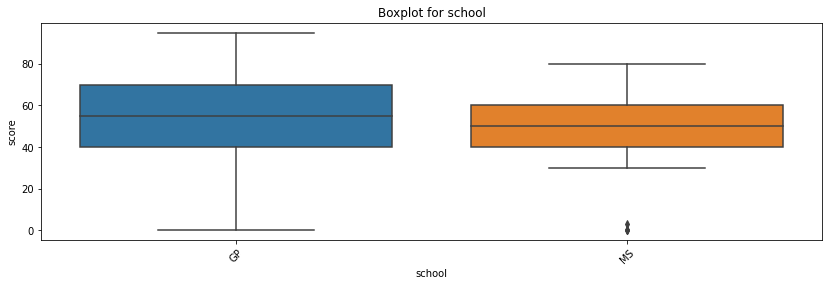

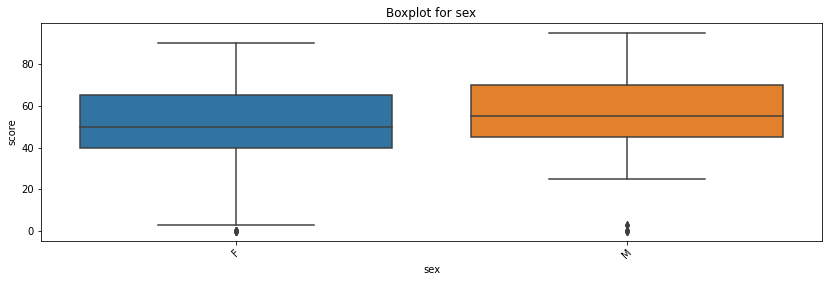

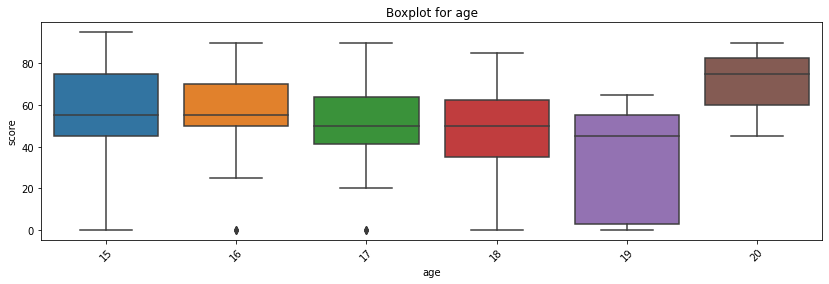

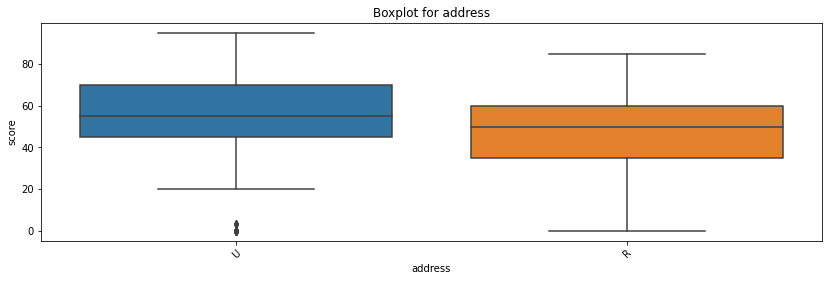

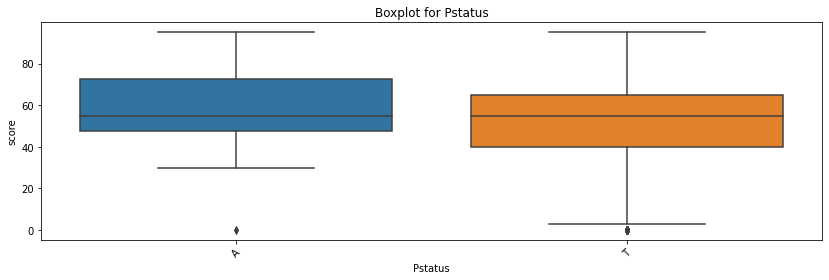

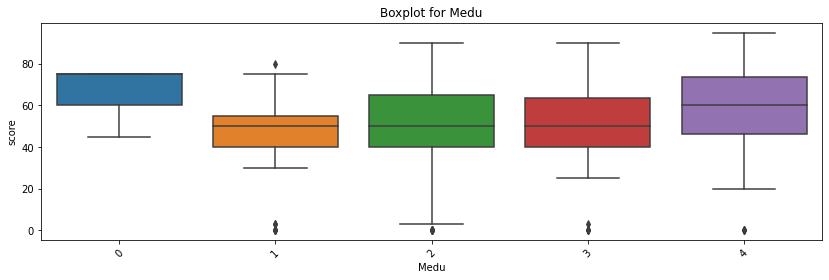

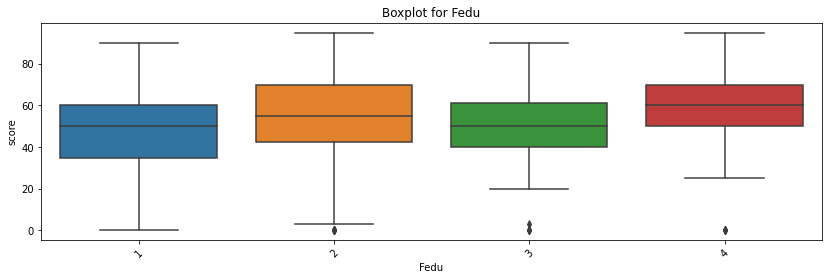

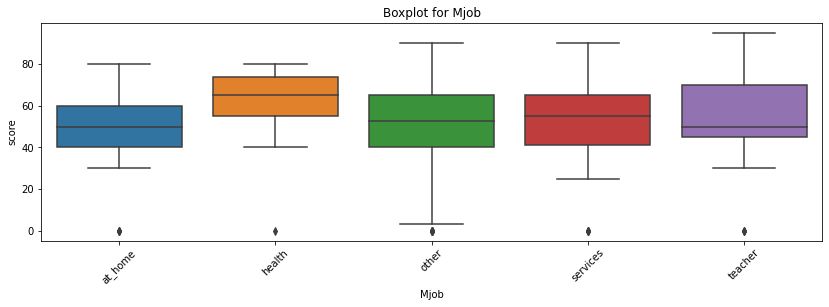

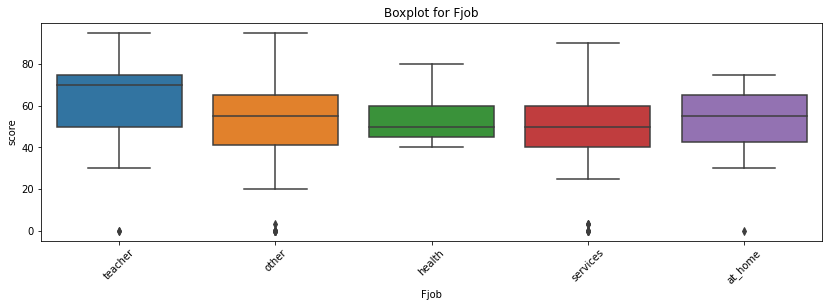

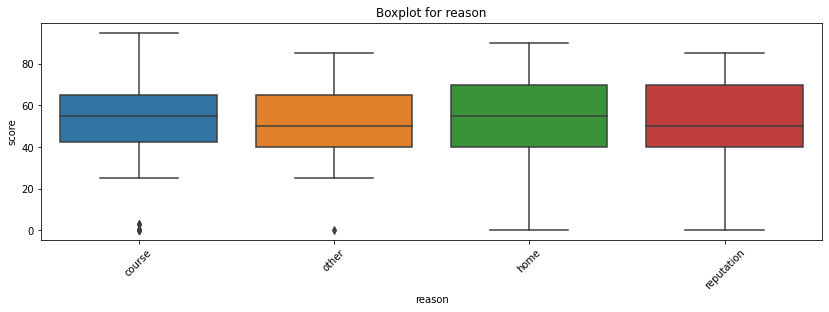

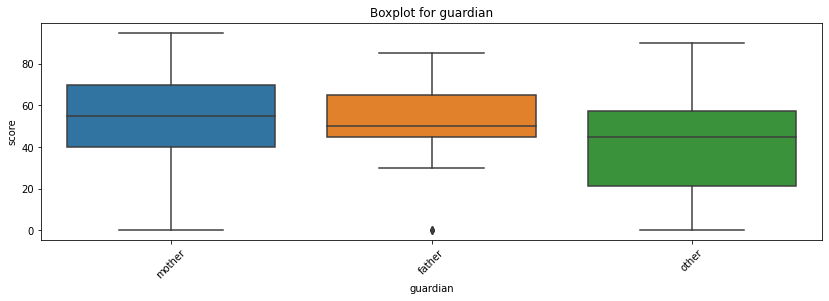

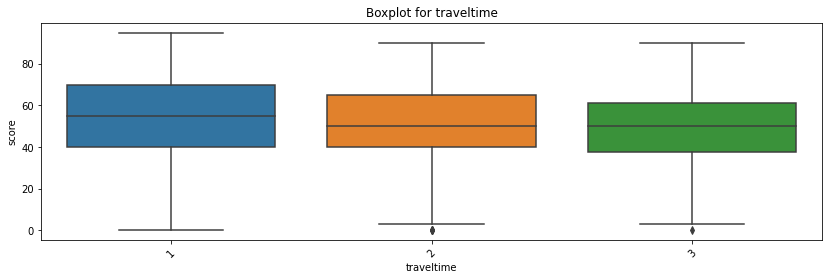

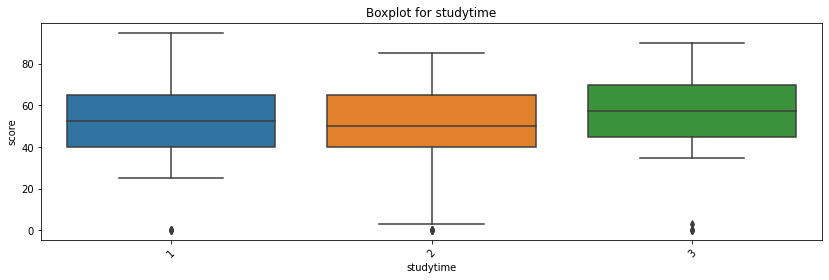

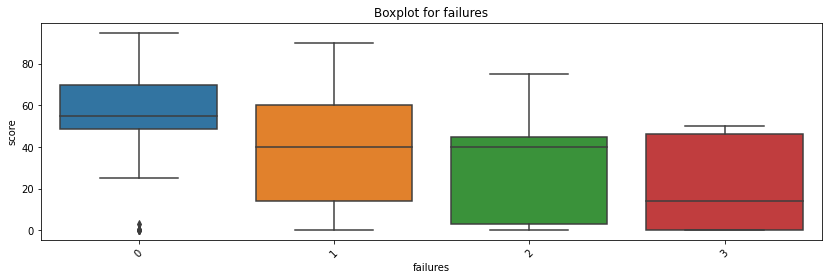

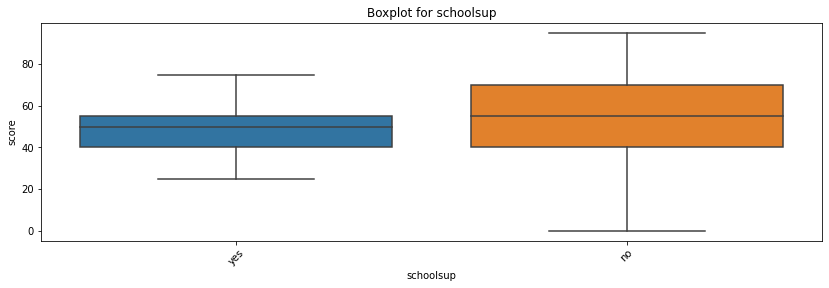

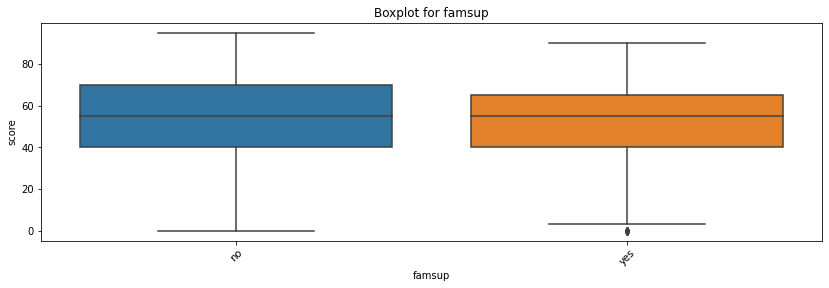

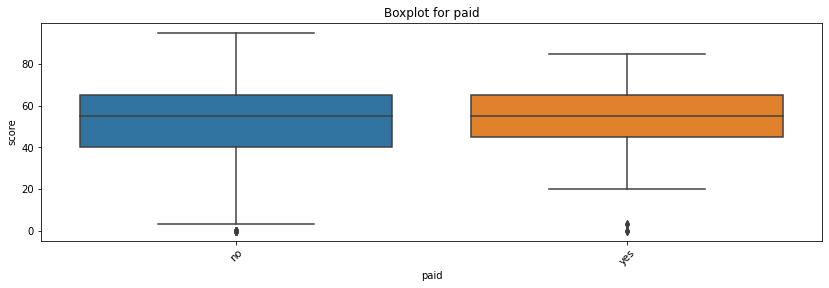

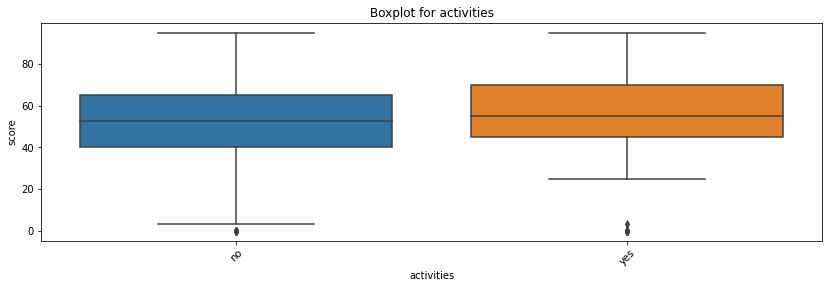

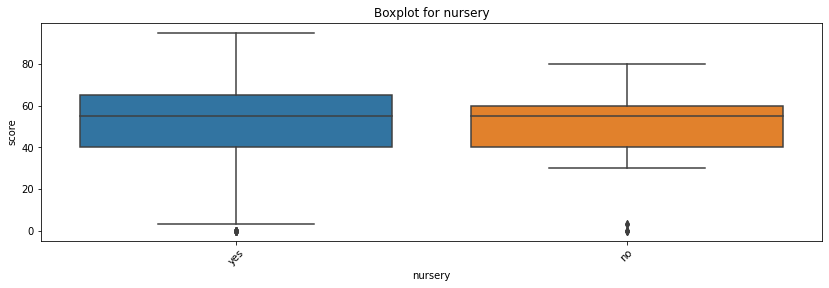

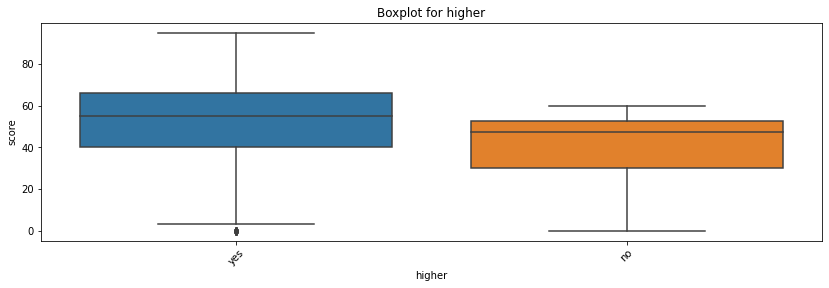

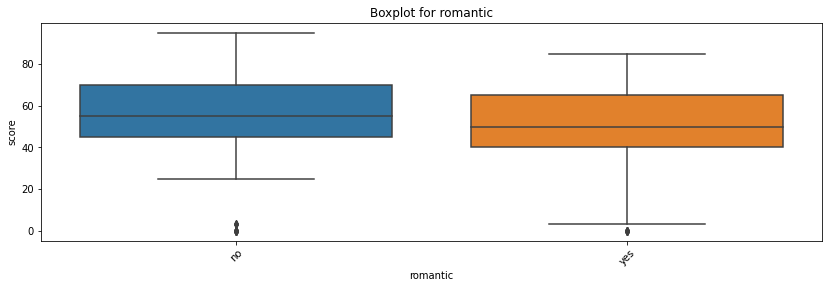

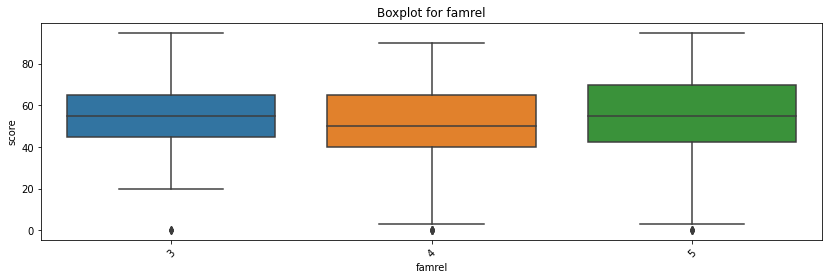

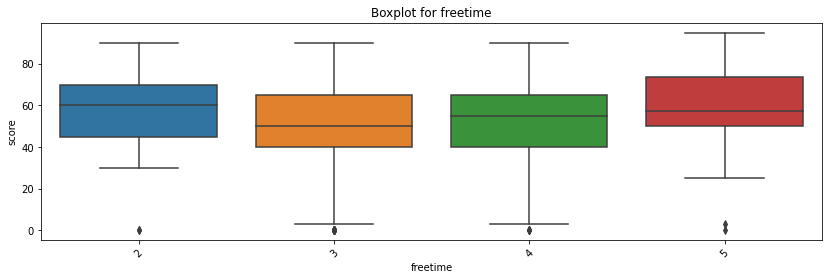

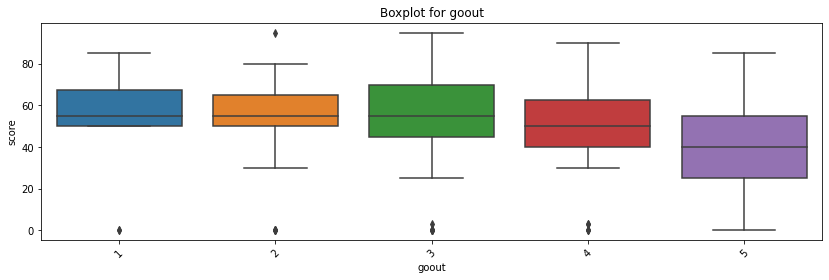

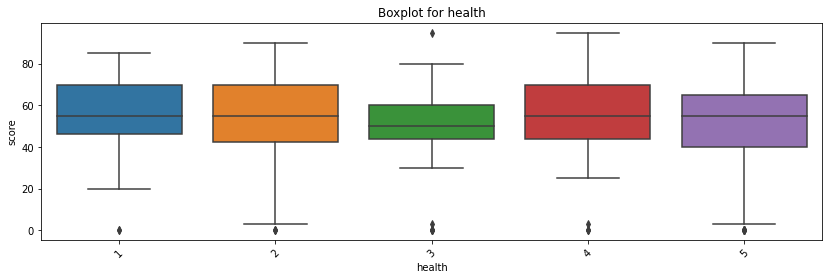

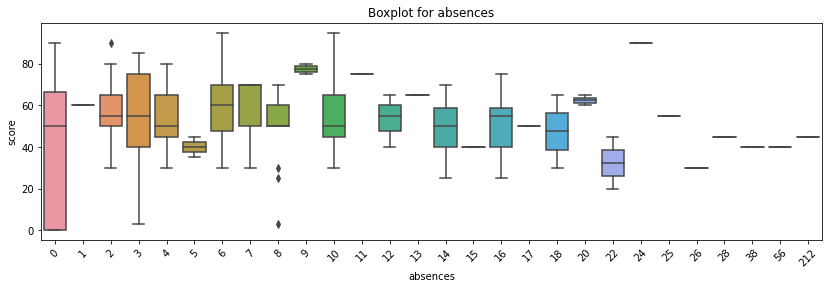

In [61]:
'''Построим boxplot для всех характеристик, которые указаны в таблице'''
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=file2[column], y=file2['score'], 
                data=file2.loc[file2.loc[:, column].isin(file2.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col2 in [
    'school', 'sex', 'age', 'address',  'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher',  
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_boxplot(col2) 

In [62]:
'''Найдем статистически значимые различия'''
def get_stat_dif(column):
    cols = file2.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(file2.loc[file2.loc[:, column] == comb[0], 'score'], 
                        file2.loc[file2.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in [
    'school', 'sex', 'age', 'address','famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher


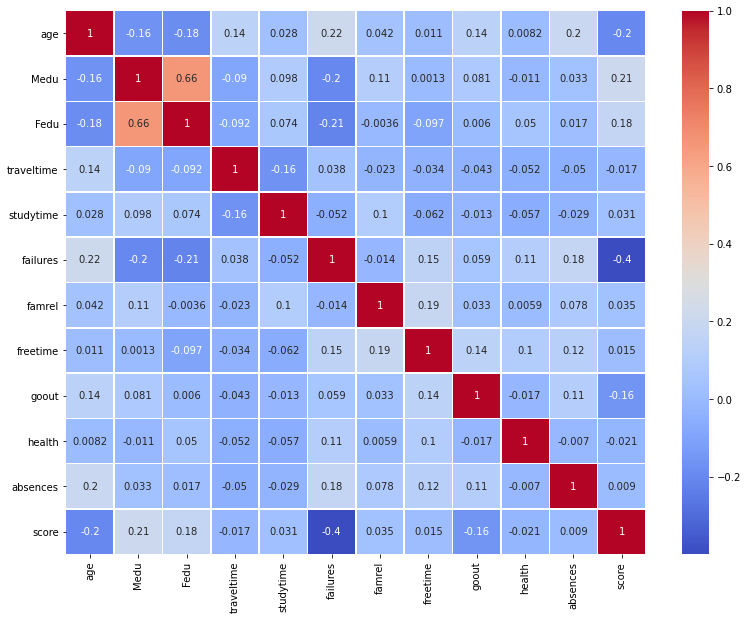

In [63]:
fig, ax = plt.subplots(figsize=(13, 10))
correlation = file2.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidth=0.5)

In [64]:
file2_for_model = file2.loc[:, ['sex', 'age', 'address', 'Medu', 'Fedu',
                              'Mjob', 'failures', 'schoolsup', 'higher', 'romantic','goout', 'score']]
file2_for_model.head(20)

,sex,age,address,Medu,Fedu,Mjob,failures,schoolsup,higher,romantic,goout,score
0,F,18,U,4,4,at_home,0,yes,yes,no,4,30
1,F,17,U,1,1,at_home,0,no,yes,no,3,30
2,F,15,U,1,1,at_home,3,yes,yes,no,2,50
3,F,15,U,4,2,health,0,no,yes,yes,2,75
4,F,16,U,3,3,other,0,no,yes,no,2,50
5,M,16,U,4,3,services,0,no,yes,no,2,75
6,M,16,U,2,2,other,0,no,yes,no,4,55
9,M,15,U,3,4,other,0,no,yes,no,1,75
10,F,15,U,4,4,teacher,0,no,yes,no,3,45
13,M,15,U,4,3,teacher,0,no,yes,no,3,55


In [65]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      236 non-null    object
 1   sex         236 non-null    object
 2   age         236 non-null    int64 
 3   address     236 non-null    object
 4   famsize     236 non-null    object
 5   Pstatus     236 non-null    object
 6   Medu        236 non-null    int32 
 7   Fedu        236 non-null    int32 
 8   Mjob        236 non-null    object
 9   Fjob        236 non-null    object
 10  reason      236 non-null    object
 11  guardian    236 non-null    object
 12  traveltime  236 non-null    int32 
 13  studytime   236 non-null    int32 
 14  failures    236 non-null    int32 
 15  schoolsup   236 non-null    object
 16  famsup      236 non-null    object
 17  paid        236 non-null    object
 18  activities  236 non-null    object
 19  nursery     236 non-null    object
 20  higher    

После грубой очистки данных резко сократилось количество колонок со статистически значимыми различиями. Потеря 40% данных сказывается довольно критично на результатах анализа. 
Что оказалось удивительно лично для меня: отсутствие яркой зависимости от того, как много времени ученик тратит на занятия, сколько он путешествует и сколько у него свободного времени. 
Образование родителей, в частности матери и ее работа, оказывает влияние на ученика (у него есть пример перед глазами, и, возможно, мама заставяляет заниматься, что повышает успехи).